# Tech Challenge | Fase 1 | pós IA para DEVs
- Silvio Sales do Nascimento Junior

### O problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:
```csv 
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```
Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.        

## Criação da base de dados
Utilizamos ChatGPT 4 com o seguinte prompt:
```txt
Crie uma base de dados no formato csv, com 21 mil registros (linhas), sobre usuários de planos de saúde com encargos médicos em um contexto do Brasil. Vou te passar as colunas dessa base de dados com informações para gerar os registros:
- Coluna com título "IMC": número com ponto flutuante, do tipo float, aleatório entre 17.000000000000000 a  41.0000000000000000.
- Coluna com título "idade": contendo em cada registro um numero do tipo inteiro, aleatório entre 0 a 98.
- Coluna com título "genero": valor de texto contendo "masculino" ou "feminino", com predominância para o feminino. 
- Coluna com título "filhos": contendo como valor um número do tipo inteiro, aleatório entre 0 a 12.
- Coluna com título "fumante": contendo "sim" ou "nao".
- Coluna com título "regiao": contendo um dos seguinte texto "Norte" ou "Nordeste" ou "Centro-Oeste" ou "Sudeste" ou "Sul".
- Coluna com título "encargos": número com ponto flutuante, do tipo float, aleatório entre 900.000000000000 a 150000.000000000000. 
Simule falhas espalhando na base de dados 235 registros com valores vazios em região.
```
Base de dados salvo no repositório do GitHub

### Configurações

In [967]:
# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Tarefas
#### 1. Exploração de dados:
#### **1.1 Carregue a base de dados e explore suas características.**

            

*utilizei alguns comandos da aula 2 de Machine Learning*

In [968]:
import pandas as pd
dataset = pd.read_csv("encargos_medicos7.csv")

In [969]:
## Vizualizar as primeiras linhas de um DataFrame
dataset.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos
0,21.318957,75,feminino,8.0,nao,Nordeste,11288.402820
1,24.389526,62,feminino,3.0,nao,Nordeste,14429.963858
2,19.410041,62,masculino,4.0,nao,Nordeste,13919.938106
3,25.938013,6,feminino,0.0,nao,Norte,14351.529731
4,25.531376,36,masculino,3.0,nao,Sudeste,9238.520877


In [970]:
"Tamanho do DataFrame (linhas, colunas):", dataset.shape

('Tamanho do DataFrame (linhas, colunas):', (21000, 7))

In [971]:
# Tipos de dados das colunas 
dataset.dtypes

IMC         float64
idade         int64
genero       object
filhos      float64
fumante      object
regiao       object
encargos    float64
dtype: object

In [972]:
# Verificando valores ausentes
dataset.isnull().sum()

IMC           0
idade         0
genero        0
filhos      235
fumante       0
regiao        0
encargos      0
dtype: int64

In [973]:
# Este comando substitui os dois de cima
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IMC       21000 non-null  float64
 1   idade     21000 non-null  int64  
 2   genero    21000 non-null  object 
 3   filhos    20765 non-null  float64
 4   fumante   21000 non-null  object 
 5   regiao    21000 non-null  object 
 6   encargos  21000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


Do total de **21.000** registros temos **235** com o campo "regiao" **vazio**

Temos 3 variáveis/colunas do tipo **texto**: **genero, fumante e regiao**

# Separando as bases em treino e teste

In [974]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)

In [975]:
print(len(df_train), "treinamento +", len(df_test), "teste")

16800 treinamento + 4200 teste


## Criando categorias de encargos

<Axes: >

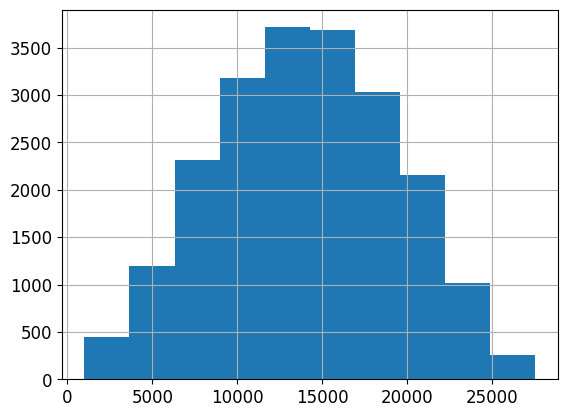

In [976]:
dataset["encargos"].hist()

Com o objetivo de criar categorias de encargos vamos reduzir a granularidade.

In [977]:
dataset["encargos_cat"] = np.ceil(dataset["encargos"] / 1.5)

dataset["encargos_cat"].where(dataset["encargos_cat"] < 5, 5.0, inplace=True)

C:\Users\Silvio\AppData\Local\Temp\ipykernel_59768\2056970550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["encargos_cat"].where(dataset["encargos_cat"] < 5, 5.0, inplace=True)


In [978]:
dataset["encargos_cat"] = pd.cut(dataset["encargos"],
                        bins=[0, 3000, 6000, 9000, 12000, np.inf],
                        labels=[1, 2, 3, 4, 5])

In [979]:
dataset["encargos_cat"].value_counts()

encargos_cat
5    13358
4     3658
3     2529
2     1186
1      269
Name: count, dtype: int64

<Axes: >

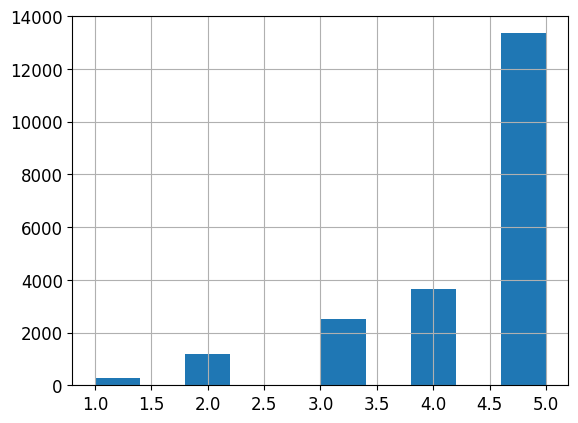

In [980]:
dataset["encargos_cat"].hist()

vamos realizar a amostragem estratificada com base na categoria de renda!

In [981]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["encargos_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [982]:
# Analisando as proporções na base de teste
strat_test_set["encargos_cat"].value_counts() / len(strat_test_set)

encargos_cat
5    0.636190
4    0.174048
3    0.120476
2    0.056429
1    0.012857
Name: count, dtype: float64

In [983]:
# Analisando as proporções na base de treino
strat_train_set["encargos_cat"].value_counts() / len(strat_train_set)

encargos_cat
5    0.636071
4    0.174226
3    0.120417
2    0.056488
1    0.012798
Name: count, dtype: float64

In [984]:
dataset["encargos_cat"].value_counts() / len(dataset)

encargos_cat
5    0.636095
4    0.174190
3    0.120429
2    0.056476
1    0.012810
Name: count, dtype: float64

In [985]:
# Categorizar IMC
imc_bins = [0, 18.5, 24.9, 29.9, 39.9, np.inf]
imc_labels = ["Baixo Peso", "Peso Normal", "Sobrepeso", "Obesidade", "Obesidade Grave"]
dataset["imc_cat"] = pd.cut(dataset["IMC"], bins=imc_bins, labels=imc_labels)

<Axes: >

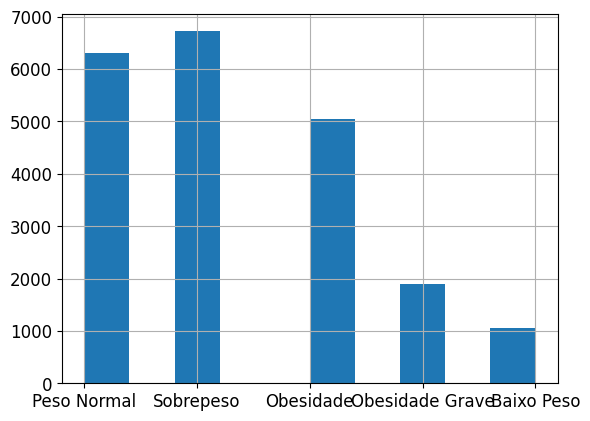

In [986]:
dataset["imc_cat"].hist()

In [987]:
# Analisando as proporções na base de teste
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["imc_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [988]:
# Analisando as proporções na base de teste
strat_test_set["imc_cat"].value_counts() / len(strat_test_set)

imc_cat
Sobrepeso          0.32
Peso Normal        0.30
Obesidade          0.24
Obesidade Grave    0.09
Baixo Peso         0.05
Name: count, dtype: float64

In [989]:
# Analisando as proporções na base de treino
strat_train_set["imc_cat"].value_counts() / len(strat_train_set)

imc_cat
Sobrepeso          0.32
Peso Normal        0.30
Obesidade          0.24
Obesidade Grave    0.09
Baixo Peso         0.05
Name: count, dtype: float64

In [990]:
dataset["imc_cat"].value_counts() / len(dataset)

imc_cat
Sobrepeso          0.32
Peso Normal        0.30
Obesidade          0.24
Obesidade Grave    0.09
Baixo Peso         0.05
Name: count, dtype: float64

In [991]:
# Função para quebrar linhas nos labels
def wrap_labels(labels, width):
    return [ '<br>'.join(label[i:i+width] for i in range(0, len(label), width)) for label in labels ]

In [992]:
# Categorizar Idade
idade_bins = [0, 12, 18, 35, 50, 65, np.inf]
idade_labels = ["Criança", "Adolescente", "Jovem\nAdulto", "Meia\nidade", "Idoso", "Idoso\nAvançado"]
dataset["idade_cat"] = pd.cut(dataset["idade"], bins=idade_bins, labels=idade_labels)

<Axes: >

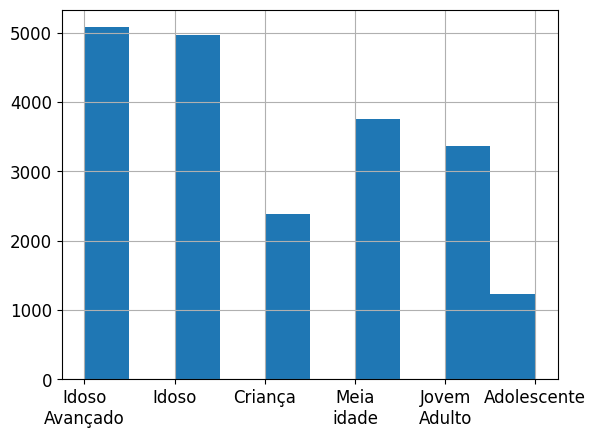

In [993]:
dataset["idade_cat"].hist()

In [994]:
# Analisando as proporções na base de teste
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(dataset, dataset["idade_cat"]):
    #strat_train_set = dataset.loc[train_index]
    #strat_test_set = dataset.loc[test_index]
#idade contem valores nulos por isso ocorre um erro.

C:\Users\Silvio\AppData\Local\Temp\ipykernel_59768\3501896408.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_encargos_by_idade= dataset.groupby('idade_cat')['encargos'].mean().sort_values()


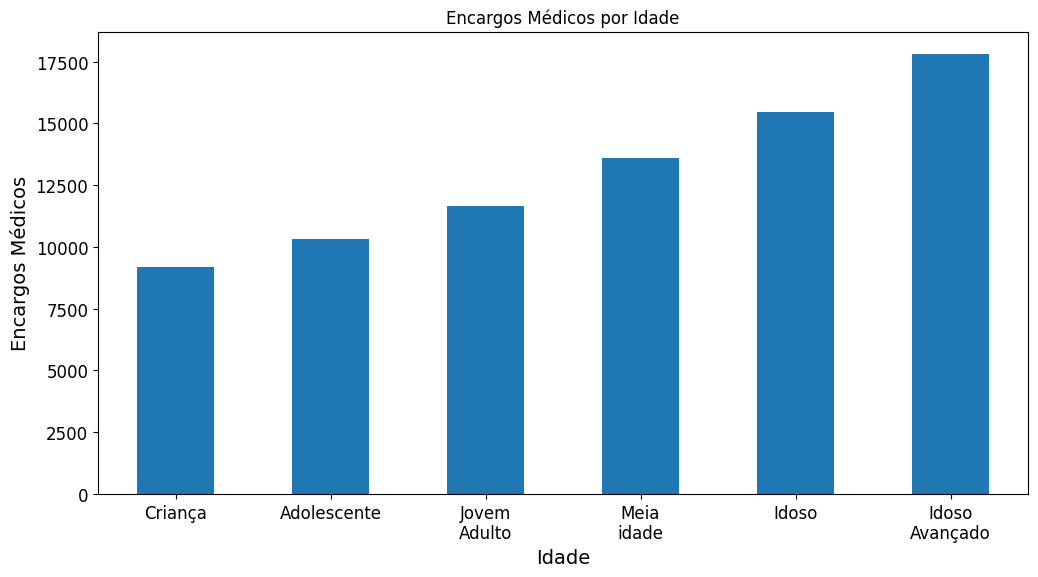

In [995]:
# Criar um barplot para visualizar os encargos por idade
plt.figure(figsize=(12, 6))
mean_encargos_by_idade= dataset.groupby('idade_cat')['encargos'].mean().sort_values()
mean_encargos_by_idade.plot(kind='bar')
plt.title("Encargos Médicos por Idade")
plt.xlabel("Idade")
plt.ylabel("Encargos Médicos")
plt.xticks(rotation=0)
plt.show()

C:\Users\Silvio\AppData\Local\Temp\ipykernel_59768\3906486012.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_encargos_by_imc = dataset.groupby('imc_cat')['encargos'].mean().sort_values()


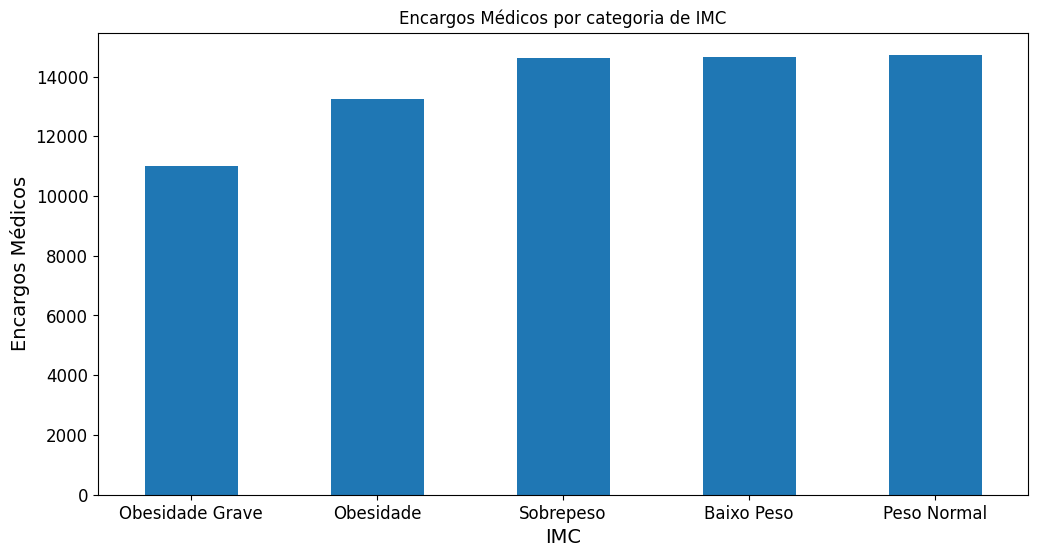

In [996]:
# Criar um barplot para visualizar os encargos por IMC
plt.figure(figsize=(12, 6))
mean_encargos_by_imc = dataset.groupby('imc_cat')['encargos'].mean().sort_values()
mean_encargos_by_imc.plot(kind='bar')
plt.title("Encargos Médicos por categoria de IMC")
plt.xlabel("IMC")
plt.ylabel("Encargos Médicos")
plt.xticks(rotation=0)
plt.show()

In [997]:
dataset.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos,encargos_cat,imc_cat,idade_cat
0,21.318957,75,feminino,8.0,nao,Nordeste,11288.402820,4,Peso Normal,Idoso\nAvançado
1,24.389526,62,feminino,3.0,nao,Nordeste,14429.963858,5,Peso Normal,Idoso
2,19.410041,62,masculino,4.0,nao,Nordeste,13919.938106,5,Peso Normal,Idoso
3,25.938013,6,feminino,0.0,nao,Norte,14351.529731,5,Sobrepeso,Criança
4,25.531376,36,masculino,3.0,nao,Sudeste,9238.520877,4,Sobrepeso,Meia\nidade


Valores médios de encargos estão distribuídos de forma estratificada!

Removendo a coluna `encargos_cat`, `imc_cat` e `idade_cat`

In [998]:
strat_train_set.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos,encargos_cat,imc_cat
1776,19.033160,84,feminino,6.0,nao,Sudeste,16476.737170,5,Peso Normal
17014,35.518172,13,masculino,0.0,nao,Sul,12387.564280,5,Obesidade
7662,25.011483,46,masculino,8.0,nao,Sul,19350.368627,5,Sobrepeso
16456,29.899349,69,feminino,1.0,nao,Sul,11957.325606,4,Sobrepeso
2832,29.161635,82,feminino,4.0,nao,Sudeste,16247.875940,5,Sobrepeso


In [999]:
strat_test_set.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos,encargos_cat,imc_cat
19551,21.714697,53,feminino,11.0,nao,Sudeste,18607.696859,5,Peso Normal
19974,22.638130,9,feminino,0.0,nao,Sul,15971.597989,5,Peso Normal
14626,29.451785,37,masculino,7.0,nao,Sul,11028.363893,4,Sobrepeso
9738,37.164686,33,feminino,1.0,nao,Sudeste,13623.264230,5,Obesidade
14101,19.796195,48,masculino,8.0,sim,Sul,18283.068280,5,Peso Normal


In [1000]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("encargos_cat", axis=1, inplace=True)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("imc_cat", axis=1, inplace=True)

# for set_ in (strat_train_set, strat_test_set):
    # set_.drop("idade_cat", axis=1, inplace=True)

In [1001]:
strat_test_set.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos
19551,21.714697,53,feminino,11.0,nao,Sudeste,18607.696859
19974,22.638130,9,feminino,0.0,nao,Sul,15971.597989
14626,29.451785,37,masculino,7.0,nao,Sul,11028.363893
9738,37.164686,33,feminino,1.0,nao,Sudeste,13623.264230
14101,19.796195,48,masculino,8.0,sim,Sul,18283.068280


In [1002]:
strat_train_set.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos
1776,19.033160,84,feminino,6.0,nao,Sudeste,16476.737170
17014,35.518172,13,masculino,0.0,nao,Sul,12387.564280
7662,25.011483,46,masculino,8.0,nao,Sul,19350.368627
16456,29.899349,69,feminino,1.0,nao,Sul,11957.325606
2832,29.161635,82,feminino,4.0,nao,Sudeste,16247.875940


#### **1.2 Analise estatísticas descritivas e visualize distribuições relevantes.**

#### Analisando textos:

In [1003]:
# criando variável com o conteúdo de teste
# para preservar os dados originais
encargos = strat_train_set.copy()

In [1004]:
# Analisando quantas categorias de regiões existem:
set(encargos["regiao"])

{'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'}

In [1005]:
# Verificando qtd de registros de cada região
encargos["regiao"].value_counts()

regiao
Sudeste         6724
Sul             4187
Nordeste        2570
Norte           1682
Centro-Oeste    1637
Name: count, dtype: int64

In [1006]:
# Verificando qtd de registros de fumantes e não fumantes
encargos["fumante"].value_counts()

fumante
nao    12632
sim     4168
Name: count, dtype: int64

In [1007]:
# Verifiando a qtd de registros de genero
encargos["genero"].value_counts()

genero
feminino     9935
masculino    6865
Name: count, dtype: int64

Existem **predominâncias** de registros:
* na região **Sudeste**
* pessoas **não fumantes**
* gênero **feminino**

#### Analisando dados númericos
**Estatísticas DESCRITIVAS**

In [1008]:
encargos.describe()

,IMC,idade,filhos,encargos
count,16800.000000,16800.00000,16612.000000,16800.000000
mean,28.070966,46.67506,4.845895,14039.111270
std,6.673913,25.40613,3.805230,5280.960320
min,17.002732,0.00000,0.000000,997.026371
25%,22.782494,26.00000,1.000000,10123.513977
50%,27.308551,49.00000,4.000000,14071.471739
75%,32.658150,65.00000,8.000000,17924.478796
max,40.999668,98.00000,12.000000,27560.122316


Distribuições com histogramas:

array([[<Axes: title={'center': 'IMC'}>,
        <Axes: title={'center': 'idade'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

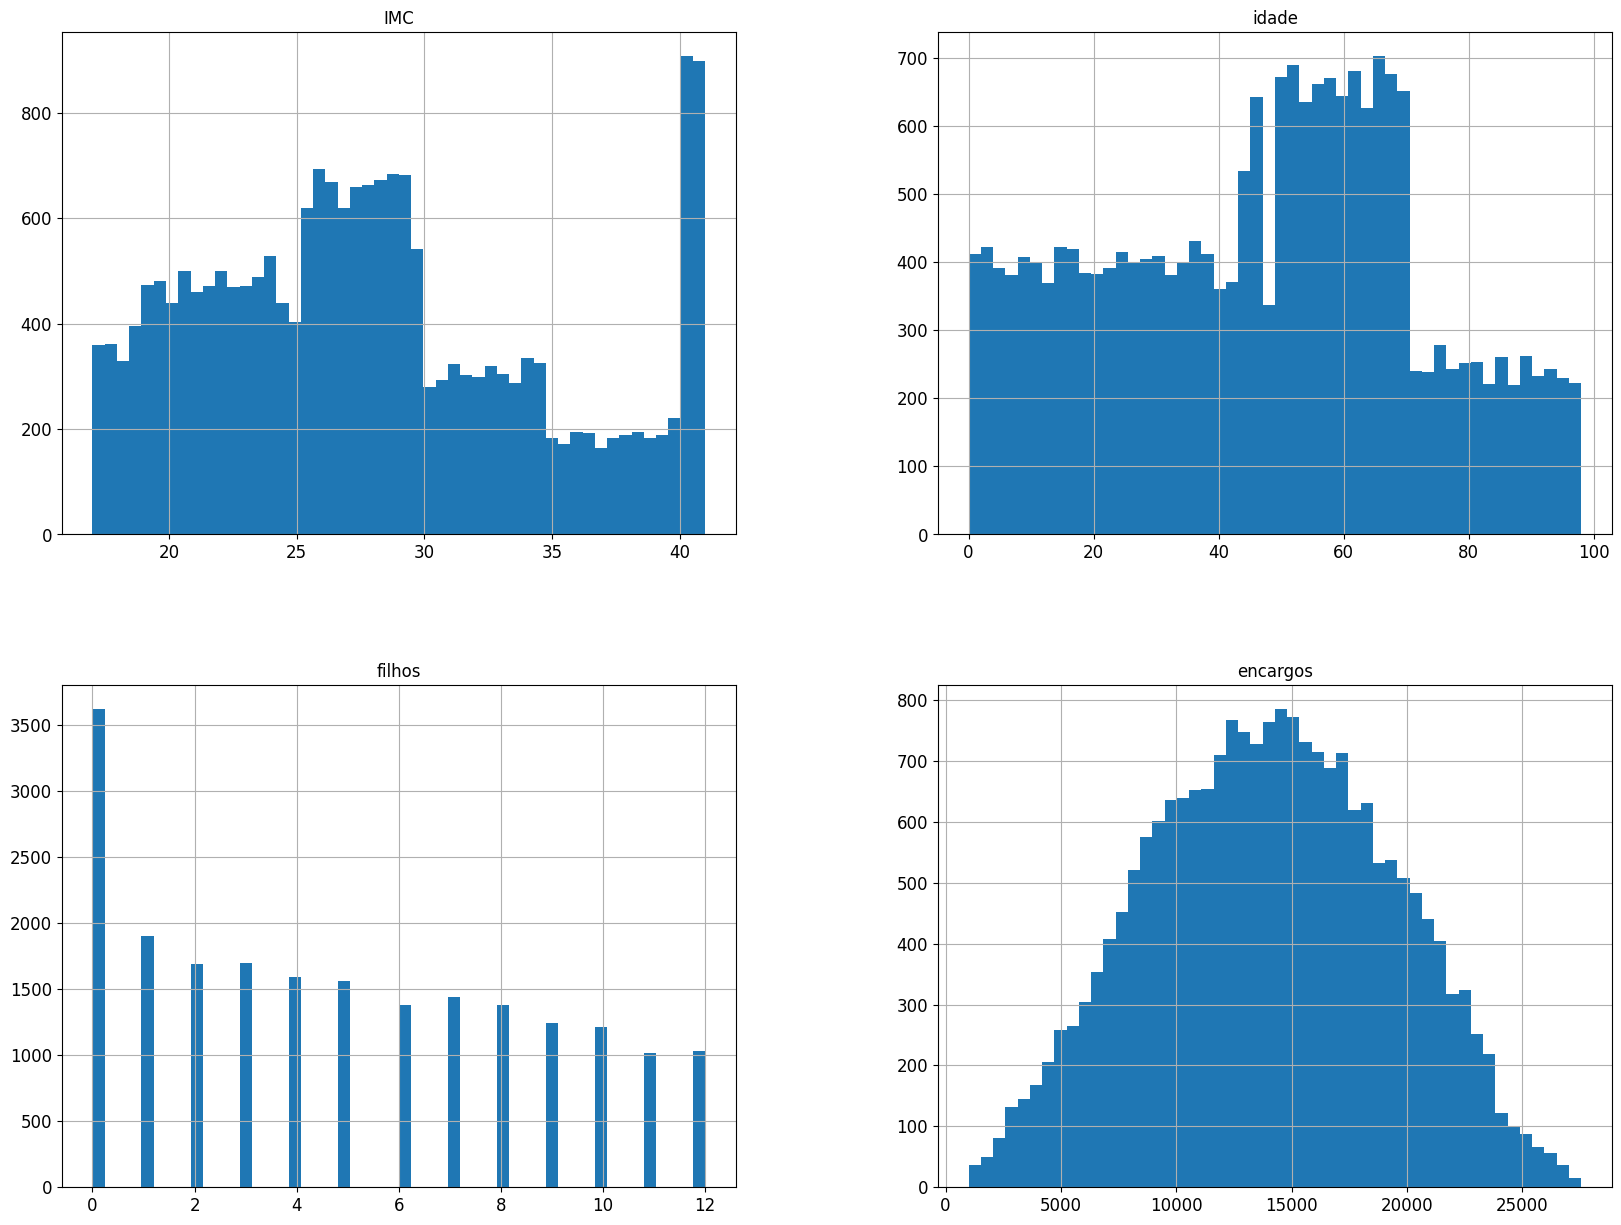

In [1009]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(20,15))

(array([12632.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4168.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

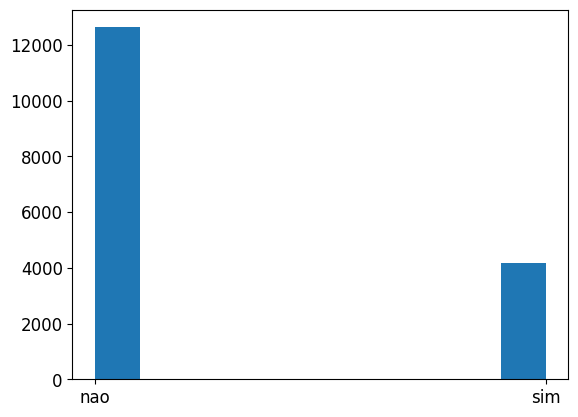

In [1010]:
plt.hist(encargos['fumante'])

(array([9935.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6865.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

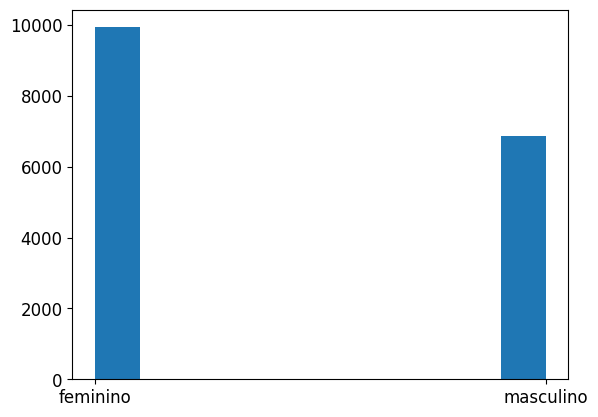

In [1011]:
plt.hist(encargos['genero'])

(array([6724.,    0., 4187.,    0.,    0., 1637.,    0., 2570.,    0.,
        1682.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

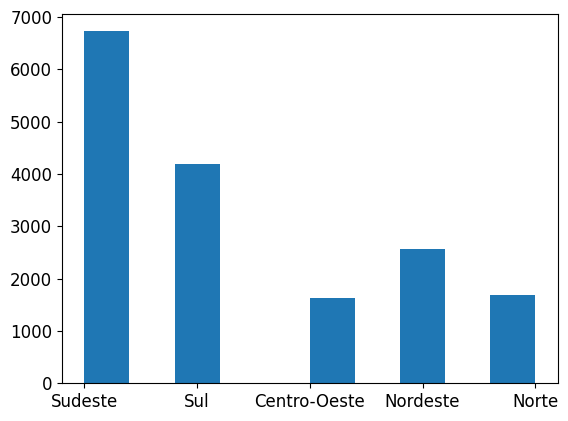

In [1012]:
plt.hist(encargos['regiao'])

## Buscando correlações

In [1013]:
corr_matrix = encargos.corr(numeric_only=True)

In [1014]:
corr_matrix["encargos"].sort_values(ascending=False)

encargos    1.000000
idade       0.573994
filhos      0.324636
IMC        -0.210273
Name: encargos, dtype: float64

array([[<Axes: xlabel='encargos', ylabel='encargos'>,
        <Axes: xlabel='idade', ylabel='encargos'>,
        <Axes: xlabel='filhos', ylabel='encargos'>],
       [<Axes: xlabel='encargos', ylabel='idade'>,
        <Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='filhos', ylabel='idade'>],
       [<Axes: xlabel='encargos', ylabel='filhos'>,
        <Axes: xlabel='idade', ylabel='filhos'>,
        <Axes: xlabel='filhos', ylabel='filhos'>]], dtype=object)

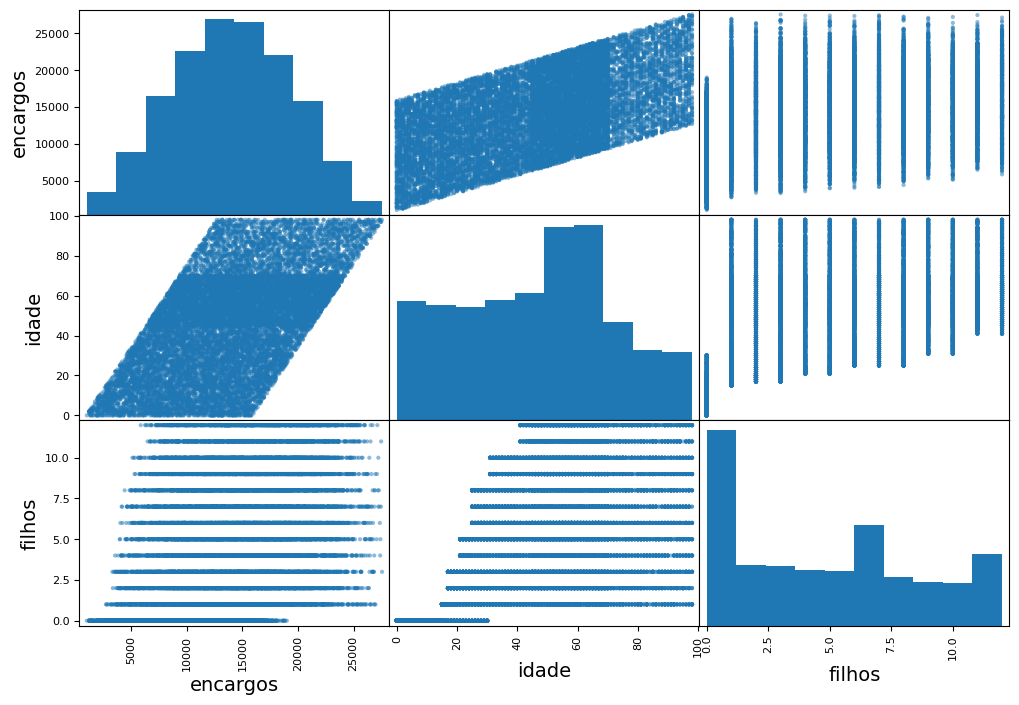

In [1015]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["encargos", "idade", "filhos"]
scatter_matrix(encargos[attributes], figsize=(12, 8))

### Interpretação dos Coeficientes de Correlação:

* idade: 0.573994
Este valor indica uma correlação positiva moderada com os encargos. Isso significa que, à medida que a idade aumenta, os encargos tendem a aumentar também.

* filhos: 0.324636
Este valor indica uma correlação positiva fraca com os encargos. Isso sugere que, à medida que o número de filhos aumenta, os encargos também tendem a aumentar, mas a relação não é tão forte quanto com a idade.

* IMC: -0.210273
Este valor indica uma correlação negativa fraca com os encargos. Isso sugere que, à medida que o IMC aumenta, os encargos tendem a diminuir, mas essa relação é fraca.

### Conclusão:
A variável "idade" possui a melhor correlação com os encargos (0.573994), indicando uma relação moderadamente forte e positiva. Isso sugere que a idade é um bom preditor dos encargos médicos neste conjunto de dados.

A variável "filhos" também tem uma correlação positiva, mas mais fraca (0.324636). A variável "IMC" tem uma correlação negativa fraca (-0.210273), indicando que não é um bom preditor dos encargos médicos neste contexto.

Observações encontradas:
* Nota-se uma tendência maior em torno de IMCs classificados como sobrepeso (25-30).
* A idade parece ter uma distribuição relativamente uniforme, com um pico na faixa dos 50, refletindo maior preocupação com planos de saúde nessa faixa etária.
* A maioria das pessoas na base de dados não tem filhos ou tem poucos filhos. Isso é esperado, considerando que pessoas mais jovens que possuem (menos de 14 anos) costuman não ter filhos.
* Os encargos médicos mostram uma distribuição com uma cauda longa à direita, indicando que a maioria das pessoas tem encargos menores, com alguns indivíduos tendo encargos muito altos. Este padrão é típico para despesas médicas, onde a maioria tem custos baixos a moderados regularmente, mas poucos enfrentam condições de alto custo que elevam drasticamente os encargos.

# Analisando preços dos encargos

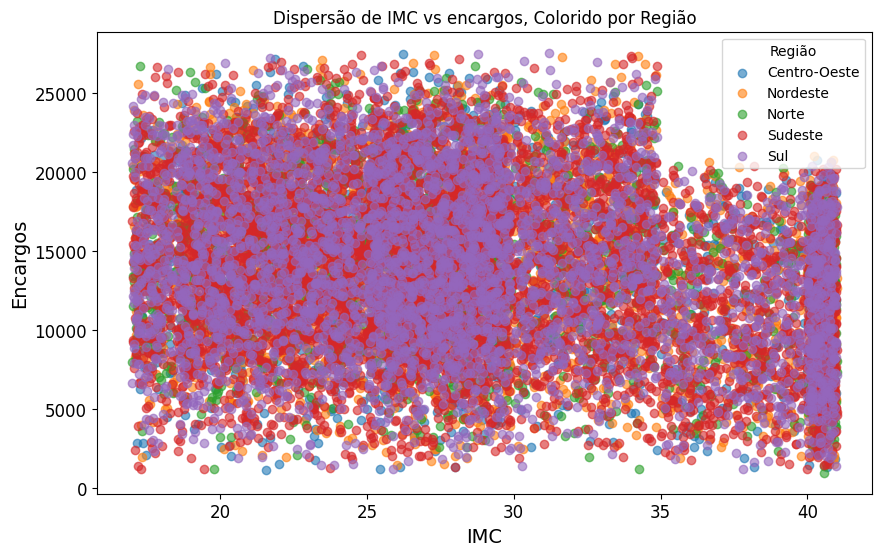

In [1016]:
# Supondo que 'data' é o seu DataFrame já carregado
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupando dados por 'região' e plotando cada grupo
for name, group in encargos.groupby('regiao'):
    ax.scatter(group['IMC'], group['encargos'], label=name, alpha=0.6)

# Adicionando título, etiquetas e legenda
ax.set_title('Dispersão de IMC vs encargos, Colorido por Região')
ax.set_xlabel('IMC')
ax.set_ylabel('Encargos')
ax.legend(title='Região')

plt.show()

#### 2. Pré-processamento de dados:
#### **2.1 Realize a limpeza dos dados, tratando valores ausentes (se necessário):**

In [1017]:
encargos = strat_train_set.drop("encargos", axis=1) # apagando a target para a base de treino (nosso x)
encargos_label = strat_train_set["encargos"].copy() #armazenando a target (nosso y)

In [1018]:
# listando as colunas nulas
sample_incomplete_rows = encargos[encargos.isnull().any(axis=1)].head()
sample_incomplete_rows

,IMC,idade,genero,filhos,fumante,regiao
808,36.826884,21,feminino,NaN,nao,Sudeste
431,18.549182,70,masculino,NaN,nao,Nordeste
420,18.273959,86,masculino,NaN,nao,Sudeste
18105,29.192259,73,feminino,NaN,nao,Sudeste
12914,23.352064,47,feminino,NaN,nao,Sul


In [1019]:
encargos.isnull().sum()

IMC          0
idade        0
genero       0
filhos     188
fumante      0
regiao       0
dtype: int64

**Existem valores nulos na coluna filhos**

**Antes de tratar os valores nulos vamos identificar a varidades de informações contidas nessa coluna "filhos"**

In [1020]:
encargos['filhos'].unique()

array([ 6.,  0.,  8.,  1.,  4.,  9.,  7.,  5.,  3.,  2., 11., 12., 10.,
       nan])

Vamos utilizar o **Imputer** para substituir os valores faltantes pela média.

In [1021]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Mediana não irá funcionar com atributos de texto, vamos converter `regiao`, `genero` e `fumante` 

**Como existe somente os valores "sim e "nao" vamos converter a coluna fumante para "sim" igual 1 e "nao" igual a 0**

In [1022]:
encargos['fumante'] = encargos['fumante'].replace({'sim': 1, 'nao': 0})

C:\Users\Silvio\AppData\Local\Temp\ipykernel_59768\320130967.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encargos['fumante'] = encargos['fumante'].replace({'sim': 1, 'nao': 0})


In [1023]:
encargos_medicos_num = encargos.drop(['regiao', 'genero'], axis=1)

In [1024]:
imputer.fit(encargos_medicos_num) # calculando a mediana de cada atributo e armazenando o resultado na variável statistics_

SimpleImputer(strategy='median')

In [1025]:
imputer.statistics_

array([27.30855109, 49.        ,  4.        ,  0.        ])

In [1026]:
encargos_medicos_num.median().values

array([27.30855109, 49.        ,  4.        ,  0.        ])

In [1027]:
X = imputer.transform(encargos_medicos_num) # o resultado é um array.

In [1028]:
X

array([[19.03316024, 84.        ,  6.        ,  0.        ],
       [35.51817161, 13.        ,  0.        ,  0.        ],
       [25.01148335, 46.        ,  8.        ,  0.        ],
       ...,
       [26.33815127, 97.        ,  8.        ,  1.        ],
       [40.14889193, 38.        ,  8.        ,  0.        ],
       [40.69473512, 28.        ,  1.        ,  1.        ]])

In [1029]:
encargos_medicos_tr = pd.DataFrame(X, columns=encargos_medicos_num.columns,
                          index=encargos.index)

In [1030]:
encargos_medicos_tr

,IMC,idade,filhos,fumante
1776,19.033160,84.0,6.0,0.0
17014,35.518172,13.0,0.0,0.0
7662,25.011483,46.0,8.0,0.0
16456,29.899349,69.0,1.0,0.0
2832,29.161635,82.0,4.0,0.0
...,...,...,...,...
20412,29.323772,60.0,6.0,0.0
12234,23.221169,36.0,10.0,0.0
8591,26.338151,97.0,8.0,1.0
9944,40.148892,38.0,8.0,0.0


In [1031]:
# verificando os resultados
encargos_medicos_tr.loc[sample_incomplete_rows.index.values]

,IMC,idade,filhos,fumante
808,36.826884,21.0,4.0,0.0
431,18.549182,70.0,4.0,0.0
420,18.273959,86.0,4.0,0.0
18105,29.192259,73.0,4.0,0.0
12914,23.352064,47.0,4.0,0.0


In [1032]:
imputer.strategy

'median'

In [1033]:
encargos_medicos_tr = pd.DataFrame(X, columns=encargos_medicos_num.columns,
                          index=encargos.index)

In [1034]:
encargos_medicos_tr.head()

,IMC,idade,filhos,fumante
1776,19.033160,84.0,6.0,0.0
17014,35.518172,13.0,0.0,0.0
7662,25.011483,46.0,8.0,0.0
16456,29.899349,69.0,1.0,0.0
2832,29.161635,82.0,4.0,0.0


#### **2.2 Converta variáveis categóricas em formatos adequados para modelagem:**

Criando variáveis de colunas que considerei categóricas "genero" e "regiao"

In [1035]:
genero_cat = encargos[['genero']]
genero_cat.head(10)

,genero
1776,feminino
17014,masculino
7662,masculino
16456,feminino
2832,feminino
1600,feminino
1200,masculino
12536,masculino
14120,feminino
20194,masculino


In [1036]:
regiao_cat = encargos[['regiao']]
regiao_cat.head(10)

,regiao
1776,Sudeste
17014,Sul
7662,Sul
16456,Sul
2832,Sudeste
1600,Centro-Oeste
1200,Centro-Oeste
12536,Sudeste
14120,Centro-Oeste
20194,Sudeste


Transformando variáveis categóricas ordinais em valores numéricos com a classe **OrdinalEncoder** da biblioteca scikit-learn

In [1037]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder

In [1038]:
ordinal_encoder = OrdinalEncoder()
regiao_cat_encoded = ordinal_encoder.fit_transform(regiao_cat)
regiao_cat_encoded[:10]

array([[3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [3.]])

In [1039]:
ordinal_encoder.categories_

[array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
       dtype=object)]

In [1040]:
#genero
genero_cat_encoded = ordinal_encoder.fit_transform(genero_cat)
genero_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [1041]:
ordinal_encoder.categories_

[array(['feminino', 'masculino'], dtype=object)]

Utilizando a classe **OneHotEncoder** para transformar as variáveis em representações numéricas binárias.

In [1042]:
try:
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse=False) # Versão anterior do Scikit-Learn
cat_encoder = OneHotEncoder(sparse_output=False)

# criando array com a representação binária da "regiao"
regiao_cat_1hot = cat_encoder.fit_transform(regiao_cat)
regiao_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [1043]:
# criando array com a representação binária da "genero"
genero_cat_1hot = cat_encoder.fit_transform(genero_cat)
genero_cat_1hot

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Criando a pipeline de **pré-processamento** dos dados

In [1044]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # substituindo valores nulos pela mediana
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

encargos_medicos_num_tr = num_pipeline.fit_transform(encargos_medicos_num)

In [1045]:
encargos_medicos_num_tr

array([[-1.35423926,  1.46917499,  0.30743187, -0.57441768],
       [ 1.11590111, -1.32550928, -1.27785217, -0.57441768],
       [-0.4584378 , -0.02657152,  0.83585988, -0.57441768],
       ...,
       [-0.25964777,  1.98087774,  0.83585988,  1.7408935 ],
       [ 1.80977562, -0.34146553,  0.83585988, -0.57441768],
       [ 1.89156564, -0.73508303, -1.01363817,  1.7408935 ]])

In [1046]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [1047]:
from sklearn.compose import ColumnTransformer

num_attribs = list(encargos_medicos_num)
cat_attribs = ["genero", "regiao"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

encargos_medicos_prepared = full_pipeline.fit_transform(encargos)

In [1048]:
encargos_medicos_prepared

array([[-1.35423926,  1.46917499,  0.30743187, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.11590111, -1.32550928, -1.27785217, ...,  0.        ,
         0.        ,  1.        ],
       [-0.4584378 , -0.02657152,  0.83585988, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25964777,  1.98087774,  0.83585988, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.80977562, -0.34146553,  0.83585988, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.89156564, -0.73508303, -1.01363817, ...,  0.        ,
         1.        ,  0.        ]])

In [1049]:
encargos_medicos_prepared.shape

(16800, 11)

In [1050]:
type(encargos_medicos_prepared)

numpy.ndarray

In [1051]:
column_names = [
    'IMC','idade', 'filhos', 'fumante', 'feminino', 'masculino', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

# Transformar o array em DataFrame
encargos_medicos_df = pd.DataFrame(data=encargos_medicos_prepared, columns=column_names)

# Exibir o DataFrame resultante
print(encargos_medicos_df.shape)

(16800, 11)


In [1052]:
encargos_medicos_df.head(20)

,IMC,idade,filhos,fumante,feminino,masculino,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,-1.354239,1.469175,0.307432,-0.574418,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.115901,-1.325509,-1.277852,-0.574418,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.458438,-0.026572,0.835860,-0.574418,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.273968,0.878749,-1.013638,-0.574418,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.163427,1.390451,-0.220996,-0.574418,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.403571,1.744707,1.100074,-0.574418,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.064924,0.406408,0.571646,-0.574418,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,-0.342387,1.784069,0.043218,-0.574418,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,-1.234323,0.052152,1.100074,-0.574418,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,-1.050229,0.091514,-0.485210,1.740893,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1053]:
print(encargos_medicos_df.isnull().sum())

IMC             0
idade           0
filhos          0
fumante         0
feminino        0
masculino       0
Centro-Oeste    0
Nordeste        0
Norte           0
Sudeste         0
Sul             0
dtype: int64


#### 3. Modelagem:
#### **3.1 Divida o conjunto de dados em conjuntos de treinamento e teste:**

Já fizemos anteriormente a extração das bases de teste e treino

In [1055]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(encargos_medicos_df, test_size = 0.2, random_state = 7)


In [ ]:
print(len(df_train), "treinamento +", len(df_test), "teste = TOTAL", len(df_train)+len(df_test) )

16800 treinamento + 4200 teste = TOTAL 21000



#### **3.1 Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc):**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(encargos_medicos_prepared, encargos_label)

LinearRegression()

In [ ]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = encargos.iloc[:5]
some_labels = encargos_label.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(encargos_medicos_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [18476.43497198  9983.08013487 14010.63142681 16672.81174138
 18176.66468512]


Compare com os valores reais:

In [ ]:
print("Labels:", list(some_labels))

Labels: [16476.737169830005, 12387.564279714878, 19350.36862686501, 11957.32560634789, 16247.87593951174]


#### 4. Treinamento e avaliação do modelo
#### **4.1 Treine o modelo com o conjunto de treinamento:**

#### 5. Validação estatística
#### **5.1 Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança):**

In [ ]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

encargos_predictions = lin_reg.predict(encargos_medicos_prepared)
lin_mse = mean_squared_error(encargos_label, encargos_predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

4323.601598658726

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(encargos_label, encargos_predictions)
lin_mae

3737.761546921523

Erro de margem de 4.323,60 pode ser aceitável, considerando o contexto dos dados, especialmente o intervalo e a escala dos valores que estão sendo previstos. Neste caso, os valores de "encargos" variam de aproximadamente 997 a 27.560.

Mas vamos tentar outros modelos

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(encargos_label, encargos_predictions)
print('r²',r2)

r² 0.3296657952015607


In [ ]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [ ]:
# Calcular o MAPE
mape_result = calculate_mape(encargos_label, encargos_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 36.47%


In [ ]:
encargos.head(20)

,IMC,idade,genero,filhos,fumante,regiao
1776,19.033160,84,feminino,6.0,0,Sudeste
17014,35.518172,13,masculino,0.0,0,Sul
7662,25.011483,46,masculino,8.0,0,Sul
16456,29.899349,69,feminino,1.0,0,Sul
2832,29.161635,82,feminino,4.0,0,Sudeste
1600,25.377652,91,feminino,9.0,0,Centro-Oeste
1200,28.504253,57,masculino,7.0,0,Centro-Oeste
12536,25.785973,92,masculino,5.0,0,Sudeste
14120,19.833444,48,feminino,9.0,0,Centro-Oeste
20194,21.062036,49,masculino,3.0,1,Sudeste


In [ ]:
# Exemplo de novos dados
novos_dados = pd.DataFrame({
    'IMC': [28.0],
    'idade': [45],
    'filhos': [2],
    'regiao_Nordeste': [0],
    'regiao_Norte': [0],
    'regiao_Sudeste': [1],
    'regiao_Sul': [0],
    'genero_masculino': [1],
    'fumante_sim': [0]
})

# Fazer previsões
previsoes = model.predict(novos_dados)
print(f'Previsão de custos médicos: {previsoes[0]}')

### Modelo de árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(encargos_medicos_prepared, encargos_label)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = encargos.iloc[:5]
some_labels = encargos_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = model_dtr.predict(some_data_prepared)

print("Predictions:", model_dtr.predict(some_data_prepared))

Predictions: [18254.76950072 10257.04677328 13944.95732399 17412.85350154
 17209.60691558]


In [ ]:
print("Labels:", list(some_labels))

Labels: [16476.737169830005, 12387.564279714878, 19350.36862686501, 11957.32560634789, 16247.87593951174]


In [ ]:
# mean_squared_error
encargos_predictions = model_dtr.predict(encargos_medicos_prepared)
lin_mse = mean_squared_error(encargos_label, encargos_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4077.7234517782535

In [ ]:
# mean_absolute_error
lin_mae = mean_absolute_error(encargos_label, encargos_predictions)
lin_mae

3431.145243505217

In [ ]:
r2 = r2_score(encargos_label, encargos_predictions)
print('r²',r2)

r² 0.4037401303756786


In [ ]:
# Calcular o MAPE
mape_result = calculate_mape(encargos_label, encargos_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 33.28%


#### 6. Conclusão

Apresente resultados visuais, como gráficos de previsões vs. valores reais.

Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.